# **Exploratory Data Analysis on IMDb Non-Commercial Datasets**

#### Things Explored in the notebook



*   Analysis on the Title Basics Dataset
*   Top of the list and Rating Analysis
*   Movies Analysis based on Number of Votes and Ratings
*   Analysis on Principals Dataset
*   Using the Names Dataset to get some inference.




   

## Import Necessary Libraries

In [1]:
import requests
import gzip
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data from the IMDB

In [2]:
azDictionary = {"titleRatings.gz": "https://datasets.imdbws.com/title.ratings.tsv.gz",
                "title.basics.gz":"https://datasets.imdbws.com/title.basics.tsv.gz",
                "title.principals.gz":"https://datasets.imdbws.com/title.principals.tsv.gz",
                "name.basics.gz":"https://datasets.imdbws.com/name.basics.tsv.gz"}


for fileName,fileURL in azDictionary.items():
 response = requests.get(fileURL);
 with open(fileName, 'wb') as f:
    f.write(response.content)

 outputFile = fileName+'unzipped_file.tsv'
 with gzip.open(fileName, 'rb') as f_in:
    with open(outputFile, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

 print(f'File unzipped and saved to {outputFile}')

File unzipped and saved to titleRatings.gzunzipped_file.tsv
File unzipped and saved to title.basics.gzunzipped_file.tsv
File unzipped and saved to title.principals.gzunzipped_file.tsv
File unzipped and saved to name.basics.gzunzipped_file.tsv


In [4]:
chunk_size = 10000

In [5]:
cols_to_use = ['tconst','titleType','runtimeMinutes','genres','primaryTitle','isAdult','startYear']
chunks = pd.read_table(r'/content/title.basics.gzunzipped_file.tsv', chunksize=chunk_size, usecols=cols_to_use)
imdb_TitleBasics = pd.concat(chunks, ignore_index=True)


In [5]:
cols_to_use = ['nconst', 'primaryName']
chunks = pd.read_table(r'/content/name.basics.gzunzipped_file.tsv', chunksize=chunk_size, usecols=cols_to_use)
imdb_Names = pd.concat(chunks, ignore_index=True)


In [6]:
chunks = pd.read_table(r'/content/titleRatings.gzunzipped_file.tsv', chunksize=chunk_size)
imdb_Ratings = pd.concat(chunks, ignore_index=True)


In [7]:
cols_to_use = ['tconst', 'nconst','job','category']
chunks = pd.read_table(r'/content/title.principals.gzunzipped_file.tsv', chunksize=chunk_size, usecols=cols_to_use)
imdb_Principals = pd.concat(chunks, ignore_index=True)


### Let's start with the Title Basics Analysis

In [9]:
imdb_TitleBasics.describe()

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres
count,11176312,11176312,11176293,11176312,11176312,11176312,11175682
unique,11176312,11,5016259,44,244,935,2381
top,tt9916880,tvEpisode,Episode #1.1,0,\N,\N,Drama
freq,1,8580365,53217,10807572,1416893,7646905,1263749


In [6]:
imdb_TitleBasics = imdb_TitleBasics.dropna(subset=['runtimeMinutes', 'startYear'])
imdb_TitleBasics.describe()

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres
count,11176312,11176312,11176293,11176312,11176312,11176312,11175682
unique,11176312,11,5016259,44,244,935,2381
top,tt9916880,tvEpisode,Episode #1.1,0,\N,\N,Drama
freq,1,8580365,53217,10807572,1416893,7646905,1263749


#### Let's look at the title types available and the distribution in a pie chart

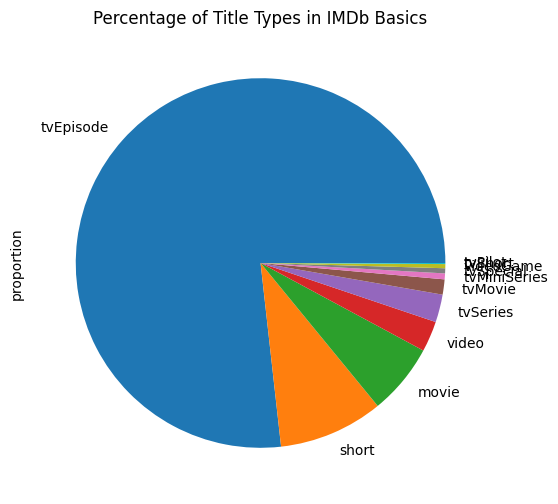

In [10]:
titleTypes = imdb_TitleBasics['titleType'].value_counts(normalize=True).mul(100).plot(kind='pie', figsize=(10,6), title='Percentage of Title Types in IMDb Basics')

#### Since we are intrested in type Movies let's filter out Movies from the titleType.

In [7]:
imdb_TitleBasics = imdb_TitleBasics[(imdb_TitleBasics.titleType == "movie") | (imdb_TitleBasics.titleType == "tvMovie")]
imdb_TitleBasics.describe()

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres
count,843519,843519,843517,843519,843519,843519,843519
unique,843519,2,725188,4,221,532,1545
top,tt9916754,movie,Hamlet,0,\N,\N,Drama
freq,1,694923,77,833647,105089,304766,153392


In [20]:
print(imdb_TitleBasics.groupby('startYear').size().reset_index(name='movie_count').sort_values(by='movie_count', ascending=False).head(30))


    startYear  movie_count
210      2022        22762
206      2018        22714
205      2017        22688
204      2016        22497
207      2019        22495
211      2023        21966
209      2021        21581
203      2015        21133
202      2014        20195
208      2020        19134
201      2013        18951
200      2012        18425
199      2011        17268
212      2024        17230
198      2010        16029
197      2009        15436
196      2008        13906
195      2007        12890
194      2006        11846
193      2005        11227
192      2004         9994
191      2003         9246
190      2002         8668
189      2001         8364
188      2000         7768
187      1999         7313
186      1998         7117
185      1997         6737
178      1990         6515
183      1995         6410


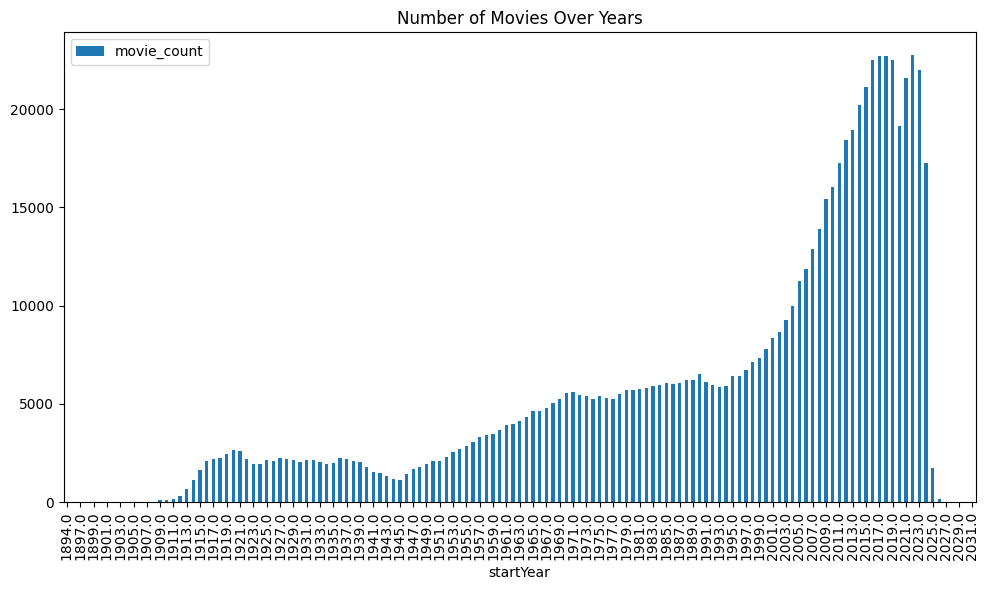

In [11]:
imdb_TitleBasics['startYear'] = pd.to_numeric(imdb_TitleBasics['startYear'], errors='coerce');
ax = imdb_TitleBasics.groupby('startYear').size().reset_index(name='movie_count').sort_values(by='startYear').plot(kind='bar', x='startYear', y='movie_count', figsize=(10, 6), title='Number of Movies Over Years');
ax.set_xticks(ax.get_xticks()[::2])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We are able to see the impact of COVID on the years that the release numbers has really gone low and so on the graph below with a steep low.

<ipython-input-24-cd889af3cb57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_filtered['startYear'] = movies_filtered['startYear'].astype(int)
<ipython-input-24-cd889af3cb57>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_filtered['runtimeMinutes'] = movies_filtered['runtimeMinutes'].astype(int)


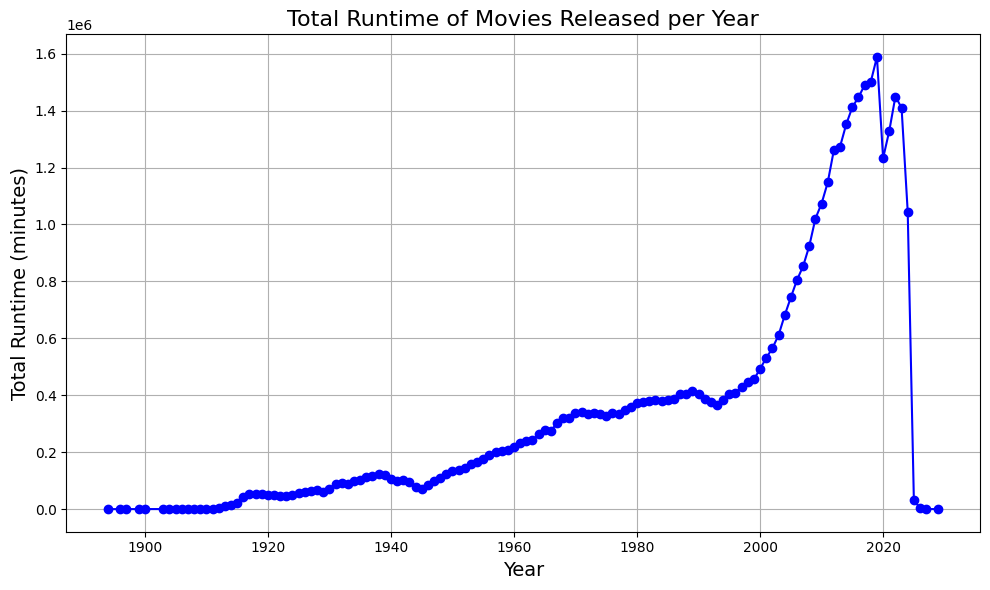

In [24]:

# Convert startyear and runtimeminutes to integers
imdb_TitleBasics['startYear'] = imdb_TitleBasics['startYear'].astype(int)
imdb_TitleBasics['runtimeMinutes'] = imdb_TitleBasics['runtimeMinutes'].astype(int)

runtime_per_year = imdb_TitleBasics.groupby('startYear')['runtimeMinutes'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(runtime_per_year['startYear'], runtime_per_year['runtimeMinutes'], marker='o', linestyle='-', color='b')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Runtime (minutes)', fontsize=14)
plt.title('Total Runtime of Movies Released per Year', fontsize=16)

plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-25-b0585e7c06a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_filtered['startYear'] = movies_filtered['startYear'].astype(int)
<ipython-input-25-b0585e7c06a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_filtered['isAdult'] = movies_filtered['isAdult'].astype(int)


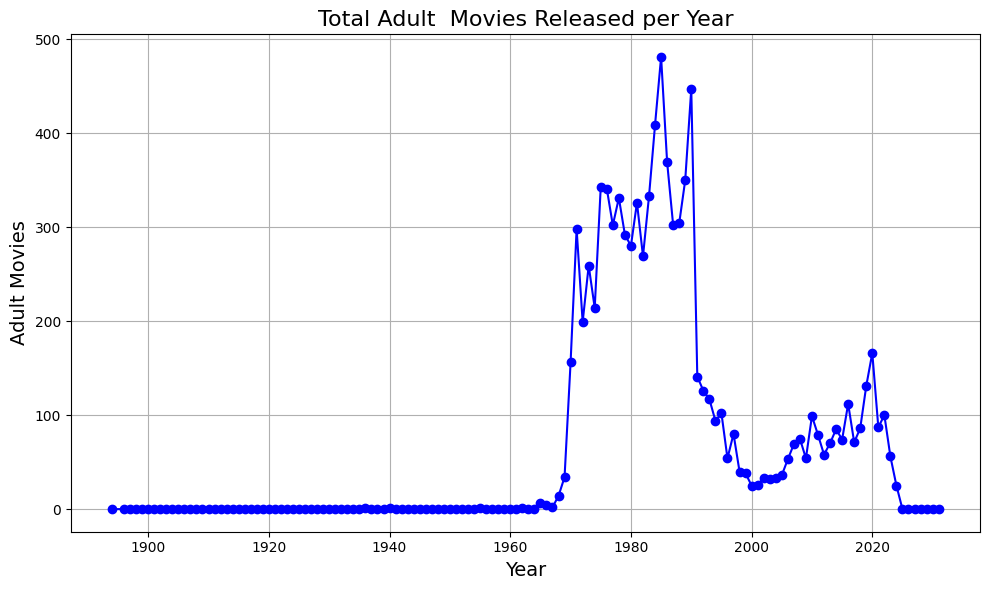

In [25]:
movies_filtered = imdb_TitleBasics[(imdb_TitleBasics['startYear'] != '\\N') & (imdb_TitleBasics['isAdult'] != '\\N')]

# Convert startyear and runtimeminutes to integers
movies_filtered['startYear'] = movies_filtered['startYear'].astype(int)
movies_filtered['isAdult'] = movies_filtered['isAdult'].astype(int)

isAdultPerYear = movies_filtered.groupby('startYear')['isAdult'].sum().reset_index()

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(isAdultPerYear['startYear'], isAdultPerYear['isAdult'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Adult Movies', fontsize=14)
plt.title('Total Adult  Movies Released per Year', fontsize=16)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

We are able to observe that the Adult Movies have increased post 1960 but maybe the data is missing. This details is essential before airing legacy content to
make sure that a compliance is done before telecast.

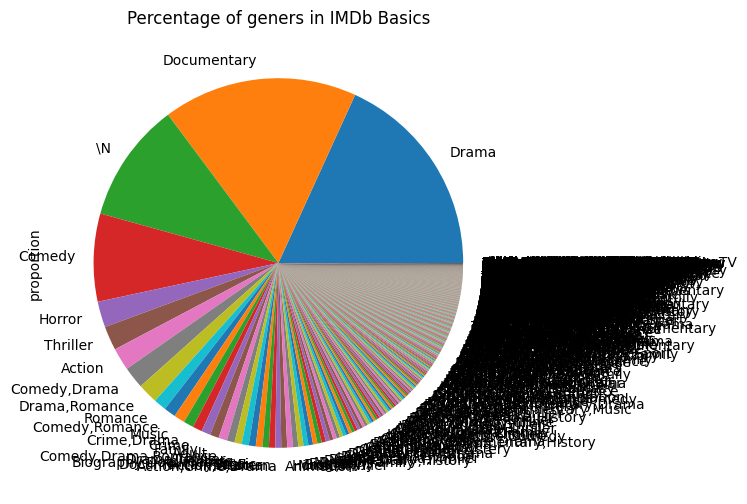

In [26]:
titleTypes = imdb_TitleBasics['genres'].value_counts(normalize=True).mul(100).plot(kind='pie', figsize=(10,6), title='Percentage of geners in IMDb Basics')

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
temp = imdb_TitleBasics.genres.dropna()
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
bag_of_genres = vec.transform(temp)
unique_genres =  vec.get_feature_names_out()
np.array(unique_genres)

array(['action', 'adult', 'adventure', 'animation', 'biography', 'comedy',
       'crime', 'documentary', 'drama', 'family', 'fantasy', 'film-noir',
       'game-show', 'history', 'horror', 'music', 'musical', 'mystery',
       'n', 'news', 'reality-tv', 'romance', 'sci-fi', 'sport',
       'talk-show', 'thriller', 'war', 'western'], dtype=object)

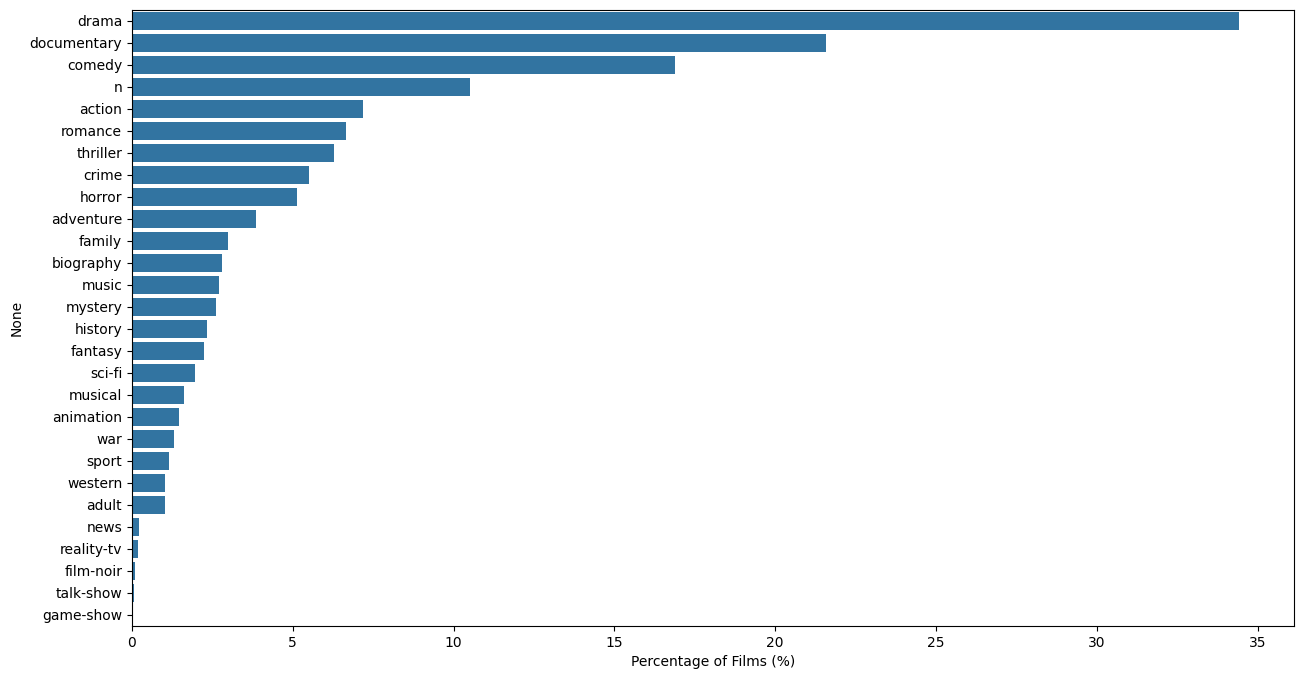

In [29]:
genres = pd.DataFrame(bag_of_genres.todense(),columns=unique_genres,index=temp.index)
sorted_genres_perc = 100*pd.Series(genres.sum()).sort_values(ascending=False)/genres.shape[0]
plt.figure(figsize=(15,8))
sns.barplot(x=sorted_genres_perc.values,y=sorted_genres_perc.index,orient="h")
plt.xlabel("Percentage of Films (%)")
plt.show()

And There is a clear indicator that people love drama over romance XD

In [30]:
filtered_df = pd.merge(imdb_TitleBasics[['tconst']], imdb_Ratings, on='tconst', how='inner')

In [32]:
filtered_df.describe()

,averageRating,numVotes
count,372258.000000,3.722580e+05
mean,6.238134,3.142807e+03
std,1.381220,3.371131e+04
min,1.000000,5.000000e+00
25%,5.400000,1.800000e+01
50%,6.300000,5.500000e+01
75%,7.200000,2.760000e+02
max,10.000000,2.953131e+06


In [33]:
top_30 = filtered_df.sort_values(by='numVotes', ascending=False).head(30)

In [36]:
top_30_titles = pd.merge(top_30[['tconst','numVotes']], imdb_TitleBasics[['tconst', 'primaryTitle']], on='tconst', how='left')
print(top_30_titles[['numVotes', 'primaryTitle']])

    numVotes                                       primaryTitle
0    2953131                           The Shawshank Redemption
1    2934441                                    The Dark Knight
2    2604356                                          Inception
3    2385191                                         Fight Club
4    2310684                                       Forrest Gump
5    2267965                                       Pulp Fiction
6    2177227                                       Interstellar
7    2096899                                         The Matrix
8    2058741                                      The Godfather
9    2051454  The Lord of the Rings: The Fellowship of the Ring
10   2021764      The Lord of the Rings: The Return of the King
11   1864289                              The Dark Knight Rises
12   1843979                                              Se7en
13   1822771              The Lord of the Rings: The Two Towers
14   1734936                            

In [37]:
bottom_30 = filtered_df.sort_values(by='numVotes', ascending=False).tail(30)

In [38]:
bottom_30_titles = pd.merge(bottom_30[['tconst','numVotes']], imdb_TitleBasics[['tconst', 'primaryTitle']], on='tconst', how='left')
print(bottom_30_titles[['numVotes', 'primaryTitle']])

    numVotes                primaryTitle
0          5               Reloj, soldad
1          5         Minamoto Yoshitsune
2          5                Ece ile Nese
3          5                     Cajtnot
4          5              Yparhei agapi?
5          5              Cloud Mountain
6          5                    The Film
7          5   Duniya Khatam Ho Rahi Hai
8          5  Journey of the Sky Goddess
9          5        Teatroteka: Falowiec
10         5            Gaurav Ki Sweety
11         5                     Pierino
12         5               Kuhmon huumaa
13         5             Mr. Drug Dealer
14         5                       Baato
15         5      Children of the Webcam
16         5               Hide and Seek
17         5                Ajana Sapath
18         5              Vojvoda Djujic
19         5               Amar Prithibi
20         5                 Rock'n'Roll
21         5       Pola Weiss Documental
22         5          Étranges étrangers
23         5    

In [41]:
top_30_Runtimes =  imdb_TitleBasics[(imdb_TitleBasics['runtimeMinutes'] != '\\N')].sort_values(by='runtimeMinutes', ascending=False).head(30)
print(top_30_Runtimes[['runtimeMinutes', 'primaryTitle','titleType']])

         runtimeMinutes                                       primaryTitle  \
393256              999               Mystrio (Uno... dos... tres pilyos!)   
409856              999                                         Inday Bote   
476250              999                                    My Juan en Only   
11168485            990                                     His Last Stand   
5789351              99                           Vänrikki Stoolin tarinat   
105486               99                                     Red Sun Rising   
1950494              99                                             Orphea   
268405               99                                      Ash Wednesday   
3409454              99                                      Matching Jack   
105796               99                                           Super 8½   
8945217              99                                       The Angrez 2   
4537954              99                  Gaspard Proust: Dernier

### Let's Analyse the Principals Dataset


In [42]:
imdb_Principals.describe()

,tconst,nconst,category,job
count,88603473,88603473,88603473,88603473
unique,10129977,6454742,13,43458
top,tt0398022,nm0438471,actor,\N
freq,75,33967,21196011,72007676


In [43]:
imdb_Principals =  pd.merge(imdb_TitleBasics[['tconst']], imdb_Principals, on='tconst', how='inner')
imdb_Principals.describe()

,tconst,nconst,category,job
count,9613888,9613888,9613888,9613888
unique,821886,2506168,13,27174
top,tt8108230,nm0183659,actor,\N
freq,57,1953,2912708,7836767


In [47]:
top_30_names = pd.merge(imdb_Principals['nconst'].value_counts().reset_index(name='count').rename(columns={'index': 'nconst'}),
                        imdb_Names[['nconst', 'primaryName']],
                        on='nconst')[['nconst', 'primaryName', 'count']].head(30)

# Display result
print(top_30_names)

        nconst                      primaryName  count
0    nm0183659                   Gérard Courant   1953
1    nm3248232                      Jason Young   1529
2    nm0103977                     Brahmanandam   1133
3    nm0000636              William Shakespeare   1088
4    nm0006137                      Ilaiyaraaja   1047
5    nm0756966                      Shôji Sakai   1042
6    nm6665663                      Jordan Hill    872
7    nm7042519  Jorge Luis Villacorta Santamato    841
8    nm0772905                  Eckhart Schmidt    750
9    nm0415549                Jagathy Sreekumar    665
10   nm0305182                     Eddie Garcia    658
11   nm4278962                     Justin Beahm    630
12   nm0006982                      Adoor Bhasi    630
13   nm0246703                     Paquito Diaz    625
14   nm0007106                    Shakti Kapoor    604
15   nm0156963                Hsing-Lung Chiang    596
16   nm1930572                    Kevin MacLeod    589
17   nm000

In [48]:
top_30_names = pd.merge(imdb_Principals[imdb_Principals['category'] == 'actor']['nconst'].value_counts().reset_index(name='count').rename(columns={'index': 'nconst'}),
                        imdb_Names[['nconst', 'primaryName']],
                        on='nconst')[['nconst', 'primaryName', 'count']].head(30)

# Display result
print(top_30_names)

       nconst         primaryName  count
0   nm0103977        Brahmanandam   1133
1   nm0415549   Jagathy Sreekumar    660
2   nm0006982         Adoor Bhasi    626
3   nm0246703        Paquito Diaz    623
4   nm0305182        Eddie Garcia    620
5   nm0007106       Shakti Kapoor    603
6   nm0000616        Eric Roberts    566
7   nm0648803    Matsunosuke Onoe    566
8   nm0623427          Prem Nazir    535
9   nm0706691         Sultan Rahi    527
10  nm0619107    Masayoshi Nogami    489
11  nm0046850             Bahadur    469
12  nm0621937              Nassar    446
13  nm0007123           Mammootty    439
14  nm0000465          Ron Jeremy    422
15  nm0793813       Shin Seong-il    418
16  nm0451600         Anupam Kher    417
17  nm0080238   Tanikella Bharani    416
18  nm0023173        Max Alvarado    410
19  nm0019382        Mohammad Ali    409
20  nm0482320            Mohanlal    409
21  nm0613417          Raza Murad    408
22  nm0695177         Prakash Raj    405
23  nm0043199   

In [49]:
top_30_names = pd.merge(imdb_Principals[imdb_Principals['category'] == 'director']['nconst'].value_counts().reset_index(name='count').rename(columns={'index': 'nconst'}),
                        imdb_Names[['nconst', 'primaryName']],
                        on='nconst')[['nconst', 'primaryName', 'count']].head(30)

# Display result
print(top_30_names)

       nconst                primaryName  count
0   nm0644554                Kinya Ogawa    439
1   nm0183659             Gérard Courant    401
2   nm0462051           Satoru Kobayashi    383
3   nm0997109                Minoru Inao    345
4   nm1846347               Jirô Yoshino    260
5   nm0457554                Sakae Nitta    245
6   nm3248232                Jason Young    219
7   nm0383255              Kaoru Umezawa    213
8   nm0628860                     Wui Ng    211
9   nm0627864               Sam Newfield    210
10  nm0913835            Mamoru Watanabe    210
11  nm0538632            Masahiro Makino    206
12  nm0945487            Shinya Yamamoto    199
13  nm0772905            Eckhart Schmidt    194
14  nm0064415           William Beaudine    186
15  nm0913829             Kunio Watanabe    183
16  nm2361543             Shirô Nakagawa    181
17  nm0861703             Richard Thorpe    179
18  nm0519117                 Miles Long    175
19  nm0001238               Jesús Franco

In [51]:
top_30_names = pd.merge(imdb_Principals[imdb_Principals['category'] == 'composer']['nconst'].value_counts().reset_index(name='count').rename(columns={'index': 'nconst'}),
                        imdb_Names[['nconst', 'primaryName']],
                        on='nconst')[['nconst', 'primaryName', 'count']].head(30)

# Display result
print(top_30_names)

       nconst                   primaryName  count
0   nm0006137                   Ilaiyaraaja   1042
1   nm1930572                 Kevin MacLeod    588
2   nm0481568                  Bappi Lahiri    523
3   nm0473742  Laxmikant Shantaram Kudalkar    507
4   nm0701403     Pyarelal Ramprasad Sharma    502
5   nm0001553               Ennio Morricone    442
6   nm0006064                Manuel Esperón    439
7   nm1350644                Mou-Shan Huang    380
8   nm0005996         Gustavo César Carrión    366
9   nm0455836               Chûji Kinoshita    327
10  nm0005983              Rahul Dev Burman    319
11  nm0222219             Paravur Devarajan    314
12  nm0910881                    Eddie Wang    309
13  nm1047085               Demet Velasquez    295
14  nm0006165                  Raúl Lavista    294
15  nm0006054            Antonio Díaz Conde    293
16  nm1058607               Jeong-geun Jeon    292
17  nm0000016               Georges Delerue    288
18  nm0006136                 A

<ipython-input-50-053e6b96de7c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=imdb_Principals['category'].value_counts().index, y=imdb_Principals['category'].value_counts().values, palette='viridis'); plt.xlabel('Category'); plt.ylabel('Count'); plt.title('Distribution of Categories in imdb_Principals'); plt.xticks(rotation=45); plt.tight_layout(); plt.show()


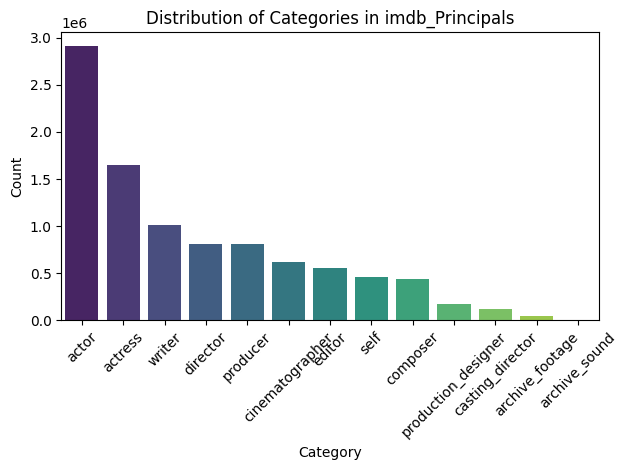

In [50]:
sns.barplot(x=imdb_Principals['category'].value_counts().index, y=imdb_Principals['category'].value_counts().values, palette='viridis'); plt.xlabel('Category'); plt.ylabel('Count'); plt.title('Distribution of Categories in imdb_Principals'); plt.xticks(rotation=45); plt.tight_layout(); plt.show()

 #### What we have done above is a basic EDA on the non commercial dataset which has given such insightful information. With more data and more time and compute power we will be able to derive a lot of other insights that can help in taking right decisions in the field.
Inspiration drawn from  
https://medium.com/analytics-vidhya/exploratory-data-analysis-imdb-dataset-cff0c3991ad5